In [55]:
from urllib.request import urlopen
import numpy as np
import time

num_obs = 300
values = np.zeros(num_obs)
for i in range(num_obs):
    value = int(urlopen('http://127.0.0.1:8000/hr/get').read().decode())
    values[i] = value
    #print(value)
    time.sleep(1)

print(values)

[ 68.  69.  70.  70.  86.  86.  86.  90.  90.  88.  88.  89.  89.  87.
  87.  84.  85.  85. 110.  94.  94.  82.  80.  80.  80.  80.  80.  85.
  89.  91.  90.  89.  90.  91.  91.  89.  88.  88.  86.  86.  86.  87.
  88.  88.  88.  88.  88.  85.  86.  88.  88.  88.  85.  84.  83.  83.
  85.  86.  85.  81.  81.  80.  78.  74.  74.  76.  79.  83.  83.  83.
  85.  90.  91.  91.  89.  84.  77.  72.  72.  72.  73.  75.  75.  75.
  73.  70.  72.  72.  75.  78.  81.  81.  80.  79.  82.  83.  83.  79.
  81.  84.  87.  89.  86.  83.  80.  75.  74.  72.  70.  74.  77.  79.
  84.  86.  86.  85.  78.  78.  79.  79.  82.  82.  82.  82.  82.  82.
  82.  85.  87.  88.  88.  87. 114. 114. 118. 118.  98.  97.  94.  90.
  90.  87.  86.  88.  92.  95.  95.  92.  90.  90.  89.  87.  86.  87.
  88.  83.  89.  90.  89.  83.  82.  82.  74.  73.  73.  73.  74.  75.
  75.  71.  73.  71.  70.  72.  73.  73.  73.  72.  66.  65.  69.  69.
  72.  71.  69.  72.  69.  69.  67.  70.  69.  72.  72.  72.  76.  77.
  82. 

In [56]:
import scipy.stats as stats

CI = (60*1000)/values
dRR = max(CI)-min(CI)
M = stats.mode(CI).mode

Text(0.5, 1.0, 'Индекс напряженности равен [37.90780922]')

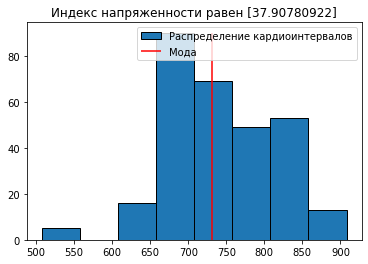

In [57]:
import matplotlib.pyplot as plt
n, bins, p = plt.hist(CI, bins=range(int(min(CI)), int(max(CI)), 50), edgecolor='black', label='Распределение кардиоинтервалов')
plt.vlines(M, ymin=0, ymax=max(n), color='r', label='Мода')
plt.legend()

AM = 0
for i in range(len(bins)):
    if bins[i] > M:
        AM = n[i-1]
        break

IN = (AM/num_obs)*100/(2*M/1000*(dRR/1000))
plt.title('Индекс напряженности равен {}'.format(IN))
